In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy
from brian2.units import *
%matplotlib inline
plt.viridis()

In [3]:
no_iterations = 3000000

# Wiring
n = 16
N = n ** 2
S = (n, n)

s_max = 32
sigma_form_forward = 2.5
sigma_form_lateral = 1
p_form_lateral = 1
p_form_forward = 0.16
p_elim_dep = 0.0245
p_elim_pot = 1.36 * np.e ** -4
f_rew = 10 ** 4 * Hz#Hz

# Membrane
v_rest = -70 * mvolt #mV
e_ext = 0 * mvolt #V
v_thr = -54 * mvolt #mV
g_max = 0.2
tau_m = 20* ms #ms
tau_ex = 5* ms #ms
e = np.e
g = g_max
pre_t = 0 * ms


# Inputs
f_mean = 20 * Hz
f_base = 5 * Hz
f_peak = 152.8  * Hz
sigma_stim = 2
t_stim = 0.02 * second
rate = 200 * Hz

# STDP
Apre = a_plus = 0.1
b = 1.2
taupre = tau_plus = 20 * ms #ms
taupost = tau_minus = 64 * ms #ms
Apost = a_minus = (a_plus * tau_plus * b) / tau_minus


In [4]:
def distance(s, t, grid_size=S, type='euclidian'):
    '''
    Function that computes distance in a grid of neurons taking into account periodic boundry conditions.
    
    First, translate source into the center of the grid.
    Second, translate target by the same amount.
    Finally, perform desired distance computation.
    '''
    s = np.asarray(s)
    t = np.asarray(t)
    grid_size = np.asarray(grid_size)
    trans = s - (grid_size//2)
    s = np.mod(s - trans, grid_size)
    t = np.mod(t - trans, grid_size)
    if type == 'manhattan':
        return s[0] - t[0] + s[1] - t[1]
    return np.sqrt((s[0] - t[0])**2 + (s[1] - t[1])**2)

In [5]:
_sim_time = 5 * 60 * second
print "In the approximate simulated time of ", _sim_time, "rewiring would be triggered", _sim_time * f_rew, "times"

In the approximate simulated time of  300. s rewiring would be triggered 3000000.0 times


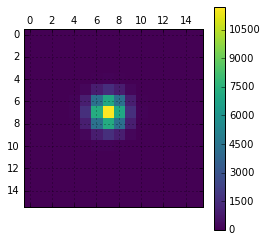

In [6]:
distro = np.zeros((16,16))
_location = (7,7)
_no_iter = int(_sim_time * f_rew)
for i in range(_no_iter):
    _random_index = np.random.randint(0, 16, 2)
    if np.random.rand() < p_form_lateral * np.e ** (-(distance(_location, _random_index)**2)/(2*sigma_form_lateral**2)):
        distro[_random_index[0], _random_index[1]] += 1

plt.matshow(distro, fignum=160)
plt.grid(visible=True)
plt.colorbar()

In [7]:
lateral_connection_strength = np.random.normal(1, sigma_form_lateral, S)

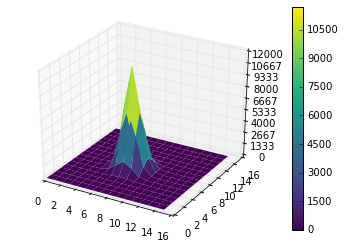

In [8]:
import matplotlib.cm as cm
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(0, 16)
Y = np.arange(0, 16)
X, Y = np.meshgrid(X, Y)
# R = np.sqrt(X**2 + Y**2)
Z = distro

m= cm.ScalarMappable(cmap=plt.viridis())
m.set_array(Z)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis,
                       linewidth=0, antialiased=True)
# ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# fig.colorbar(surf, shrink=0.5, aspect=5)
plt.colorbar(m)

plt.show()

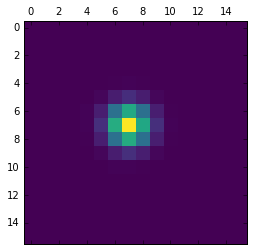

In [9]:
plt.matshow(Z)

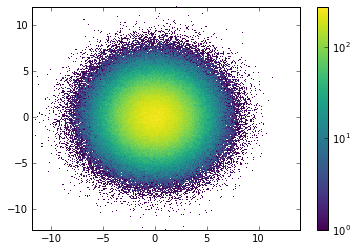

In [10]:
mu, sigma = 0, 2.5
distrox = np.random.normal(mu, sigma, 1000000)
distroy = np.random.normal(mu, sigma, 1000000)
# distro
from matplotlib.colors import LogNorm
plt.hist2d(distrox, distroy, bins=N, norm=LogNorm())
plt.colorbar()
plt.show()

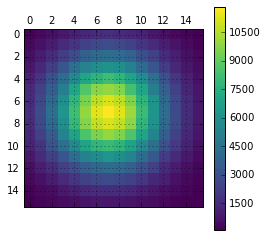

In [11]:
distro_2 = np.zeros((16,16))
_location = (7,7)
_no_iter = int(_sim_time * f_rew)
for i in range(_no_iter):
    _random_index = np.random.randint(0, 16, 2)
    if np.random.rand() < p_form_lateral * np.e ** (-(distance(_location, _random_index)**2)/(2*2*sigma_form_forward**2)):
        distro_2[_random_index[0], _random_index[1]] += 1

plt.matshow(distro_2, fignum=160)
plt.grid(visible=True)
plt.colorbar()

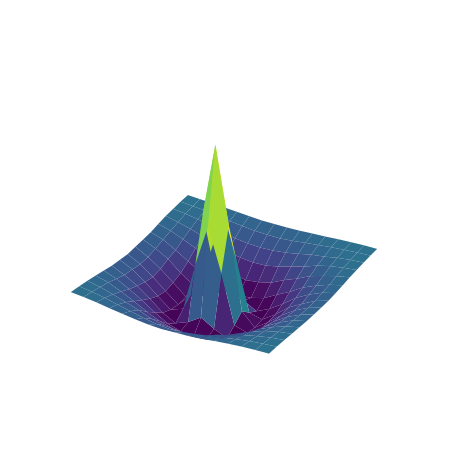

In [21]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
X = np.arange(0, 16)
Y = np.arange(0, 16)
X, Y = np.meshgrid(X, Y)
# R = np.sqrt(X**2 + Y**2)
Z = 2.8*distro - distro_2

m= cm.ScalarMappable(cmap=plt.viridis())
m.set_array(Z)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis,
                       linewidth=0, antialiased=True)
# ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.axis('off')
# fig.colorbar(surf, shrink=0.5, aspect=5)
# plt.colorbar(m)

plt.show()